In [1]:
# Import necessary functions
import numpy as np
import matplotlib.pyplot as plt

# Gathers task environment
from WCST import WcstSession

# Gathers agent
from optimal_agent import OptimalAgent

# Defines a useful function that we will use later
def moving_average(a, n):
    """
    Calculates the moving average of an array.
    Function taken from Jaime here:
    https://stackoverflow.com/questions/14313510/how-to-calculate-moving-average-using-numpy
    
    Parameters
    --------------
    a: array to be averaged
    n: size of window
    
    Returns
    --------------
    Moving average
    """
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [2]:
num_cards = 4
sess = WcstSession()
agent = OptimalAgent()

Text(0.5, 1.0, 'No Rule Change')

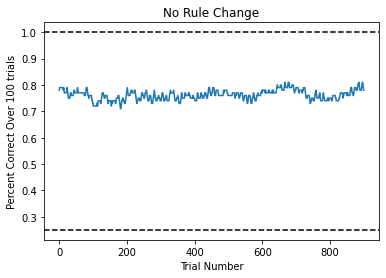

In [3]:
scores = []
for i in range(1000):
    cards = sess.get_cards()

    action = agent.make_selection(cards)

    feedback = sess.make_selection(action)
    agent.evaluate_feedback(feedback)

    scores.append(feedback)

plt.plot(moving_average(scores,100))
plt.axhline(1. / num_cards, color='black', linestyle='dashed')
plt.axhline(1., color='black', linestyle='dashed')
plt.xlabel('Trial Number')
plt.ylabel('Percent Correct Over 100 trials')
plt.title('No Rule Change')

In [5]:
scores = []
for i in range(100000):
    cards = sess.get_cards()

    action = agent.make_selection(cards)

    feedback = sess.make_selection(action)
    agent.evaluate_feedback(feedback)

    scores.append(feedback)

In [16]:
mean_score = np.mean(np.array(scores).reshape((-1,100)), axis=-1)

In [25]:
print(
    'For 100 trials,',
    np.round(np.mean(mean_score),2),
    '+/-',
    np.round(np.std(mean_score),2),
    'percent of trials are correct'
)

For 100 trials, 0.75 +/- 0.03 percent of trials are correct
